# Linear Regression for Car Price Prediction

Training School: Kiddee Lab

## Importing Python Lib

In [1]:
import warnings
warnings.filterwarnings('ignore')

#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

## Loading Dataset

In [2]:
Data_frame = pd.read_csv('../dataset/Car_Price.csv')

## Data Exploration

In [3]:
Data_frame.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [6]:
Data_frame_columns = Data_frame.columns.values
print("Number of columns:", len(Data_frame_columns))
print("Dataset's columns")
Data_frame_columns

Number of columns: 26
Dataset's columns


array(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation',
       'wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginetype', 'cylindernumber', 'enginesize', 'fuelsystem',
       'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm',
       'citympg', 'highwaympg', 'price'], dtype=object)

### Perform exploration by columns' index

In [7]:
Data_frame.iloc[:,:13].head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3


In [8]:
Data_frame.iloc[:,13:].head()

,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [9]:
print("Number of samples:", Data_frame.shape[0], "\nNumber of features:", Data_frame.shape[1])

Number of samples: 205 
Number of features: 26


### Using Describe Function of Pandas

In this, we can check total number of rows, mean and std of total value, min and max values in each feature. 

Note: This only perform numeric data (example: int or float type)

In [10]:
Data_frame.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


### Using info function of Pandas

In this, we can check total number of rows, columns, non-null values, data_type of each columns.

In [11]:
Data_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

## Data cleaning

In this data set, according to our domain knowledge, a car's price also depend on the company's name.

In [13]:
Data_frame['CarName'].value_counts()

CarName
toyota corona           6
toyota corolla          6
peugeot 504             6
subaru dl               4
mitsubishi mirage g4    3
                       ..
mazda glc 4             1
mazda rx2 coupe         1
maxda glc deluxe        1
maxda rx3               1
volvo 246               1
Name: count, Length: 147, dtype: int64

From the above result, we can see that companies' name are seperated by space.

In [14]:
Company_Name = Data_frame['CarName'].apply(lambda x : x.split(' ')[0])
Data_frame.insert(3,"Company_Name",Company_Name)  # Inserting a column at specific index

In [16]:
Data_frame_columns = Data_frame.columns.values
print("Number of columns:", len(Data_frame_columns))
print("Dataset's columns")
Data_frame_columns

Number of columns: 27
Dataset's columns


array(['car_ID', 'symboling', 'CarName', 'Company_Name', 'fueltype',
       'aspiration', 'doornumber', 'carbody', 'drivewheel',
       'enginelocation', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg',
       'highwaympg', 'price'], dtype=object)

In [17]:
Data_frame.iloc[:10,:4]

,car_ID,symboling,CarName,Company_Name
0,1,3,alfa-romero giulia,alfa-romero
1,2,3,alfa-romero stelvio,alfa-romero
2,3,1,alfa-romero Quadrifoglio,alfa-romero
3,4,2,audi 100 ls,audi
4,5,2,audi 100ls,audi
5,6,2,audi fox,audi
6,7,1,audi 100ls,audi
7,8,1,audi 5000,audi
8,9,1,audi 4000,audi
9,10,0,audi 5000s (diesel),audi


In [18]:
print("Total Number of company in dataset:", len(Data_frame["Company_Name"].unique()))
Data_frame["Company_Name"].unique()

Total Number of company in dataset: 28


array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

Duplicated names are included in dataset. If we do not fix it, it will affect our model performance.

In [19]:
Data_frame["Company_Name"] = Data_frame["Company_Name"].str.lower()

print("Total Number of company in dataset:", len(Data_frame["Company_Name"].unique()))
Data_frame["Company_Name"].unique()

Total Number of company in dataset: 27


array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

Did you notice? Total name is changed because Nissan become nissan and make them as one. Now, lets continue changing the others.

In [20]:
Data_frame["Company_Name"] = Data_frame["Company_Name"].replace('maxda','mazda')
Data_frame["Company_Name"] = Data_frame["Company_Name"].replace('porcshce','porsche')
Data_frame["Company_Name"] = Data_frame["Company_Name"].replace('toyouta','toyota')
Data_frame["Company_Name"] = Data_frame["Company_Name"].replace('vokswagen','volkswagen')
Data_frame["Company_Name"] = Data_frame["Company_Name"].replace('vw','volkswagen')

print("Total Number of company in dataset:", len(Data_frame["Company_Name"].unique()))
Data_frame["Company_Name"].unique()

Total Number of company in dataset: 22


array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

## Visualizing Data

In [21]:
print("Max price:", Data_frame["price"].max())
print("Min price:", Data_frame["price"].min())

Max price: 45400.0
Min price: 5118.0


In [22]:
Data_frame["price"].dtype

dtype('float64')

<Axes: title={'center': 'Car Price Distribution Histogram'}, xlabel='price', ylabel='Density'>

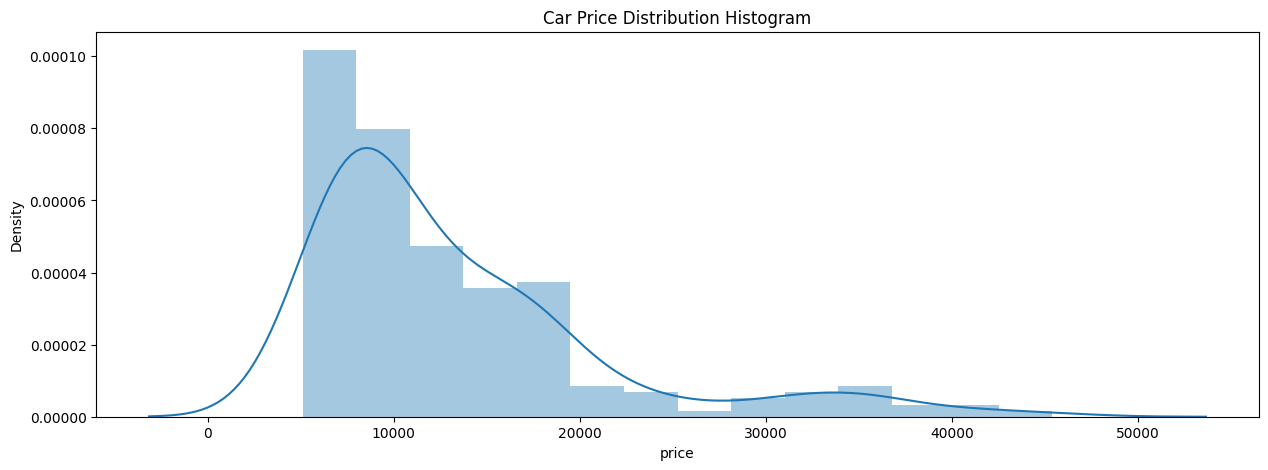

In [23]:
plt.figure(figsize=(15,5))

plt.title('Car Price Distribution Histogram')

sns.distplot(Data_frame["price"])

Data summarizing: Most of the car price are below 15k.

In [24]:
company_names = Data_frame["Company_Name"].unique()
print(company_names)
print("\n")
print(Data_frame["Company_Name"].value_counts())
print("\n")
print(Data_frame["Company_Name"].value_counts().values)
print("\n")
print(Data_frame["Company_Name"].value_counts().index.tolist())

['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'buick' 'mercury' 'mitsubishi' 'nissan' 'peugeot' 'plymouth'
 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen' 'volvo']


Company_Name
toyota         32
nissan         18
mazda          17
mitsubishi     13
honda          13
volkswagen     12
subaru         12
peugeot        11
volvo          11
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
porsche         5
isuzu           4
jaguar          3
chevrolet       3
alfa-romero     3
renault         2
mercury         1
Name: count, dtype: int64


[32 18 17 13 13 12 12 11 11  9  8  8  7  7  6  5  4  3  3  3  2  1]


['toyota', 'nissan', 'mazda', 'mitsubishi', 'honda', 'volkswagen', 'subaru', 'peugeot', 'volvo', 'dodge', 'buick', 'bmw', 'audi', 'plymouth', 'saab', 'porsche', 'isuzu', 'jaguar', 'chevrolet', 'alfa-romero', 'renault', 'mercury']


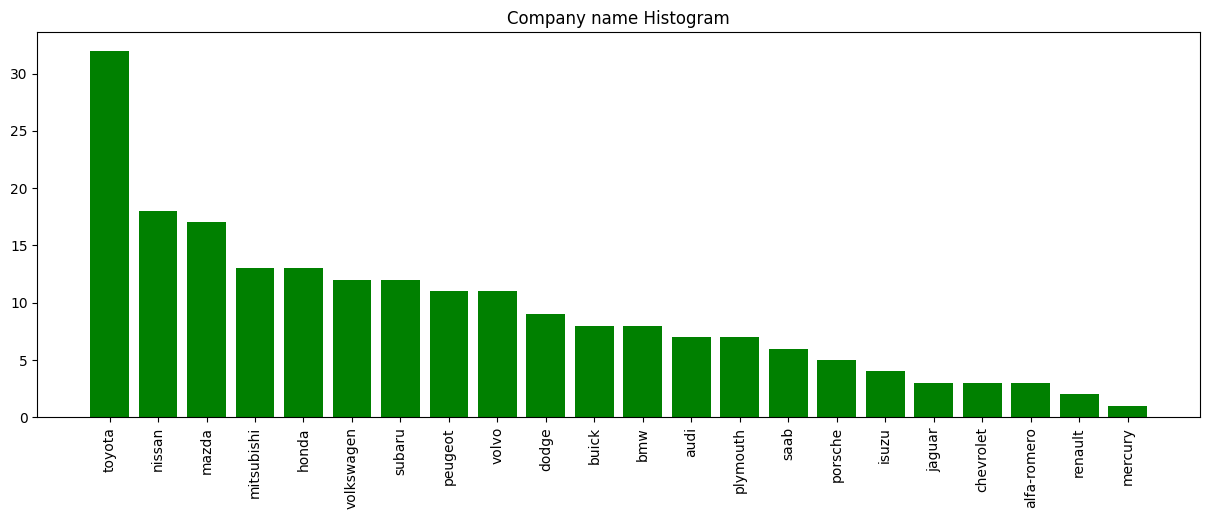

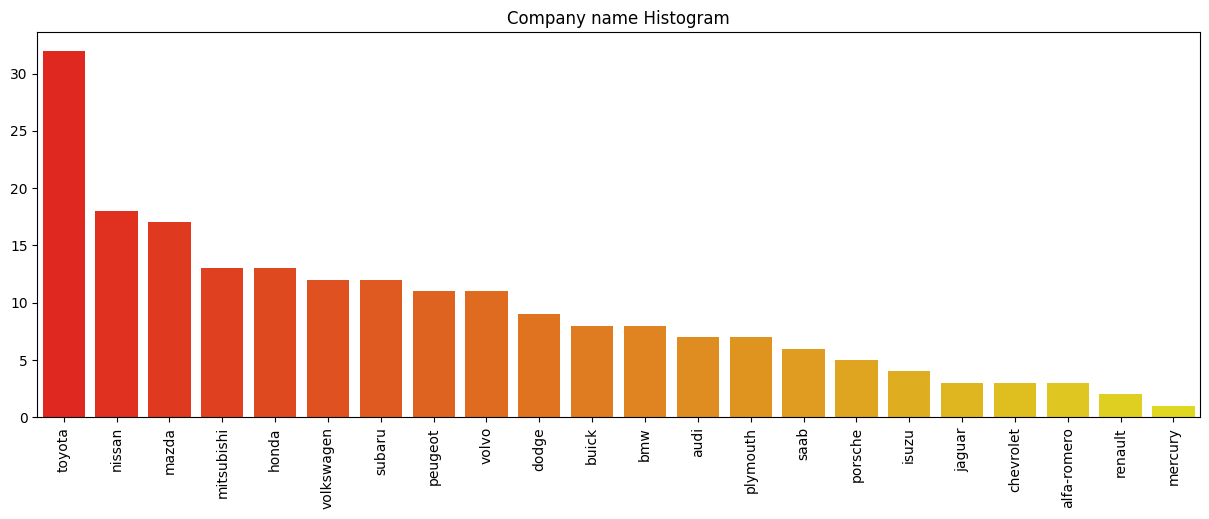

In [25]:
names = Data_frame["Company_Name"].value_counts().index.tolist()
freqneucy = Data_frame["Company_Name"].value_counts().values

plt.figure(figsize=(15,5))
plt.title('Company name Histogram')
plt.bar(names, freqneucy, color = "green")
plt.xticks(rotation='vertical')
plt.show()

plt.figure(figsize=(15,5))
plt.title('Company name Histogram')
sns.barplot(x = names, y = freqneucy, palette='autumn')
plt.xticks(rotation="vertical")
plt.show()

In [26]:
Data_frame_columns = Data_frame.columns.values
print("Number of columns:", len(Data_frame_columns))
print("Dataset's columns")
Data_frame_columns

Number of columns: 27
Dataset's columns


array(['car_ID', 'symboling', 'CarName', 'Company_Name', 'fueltype',
       'aspiration', 'doornumber', 'carbody', 'drivewheel',
       'enginelocation', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg',
       'highwaympg', 'price'], dtype=object)

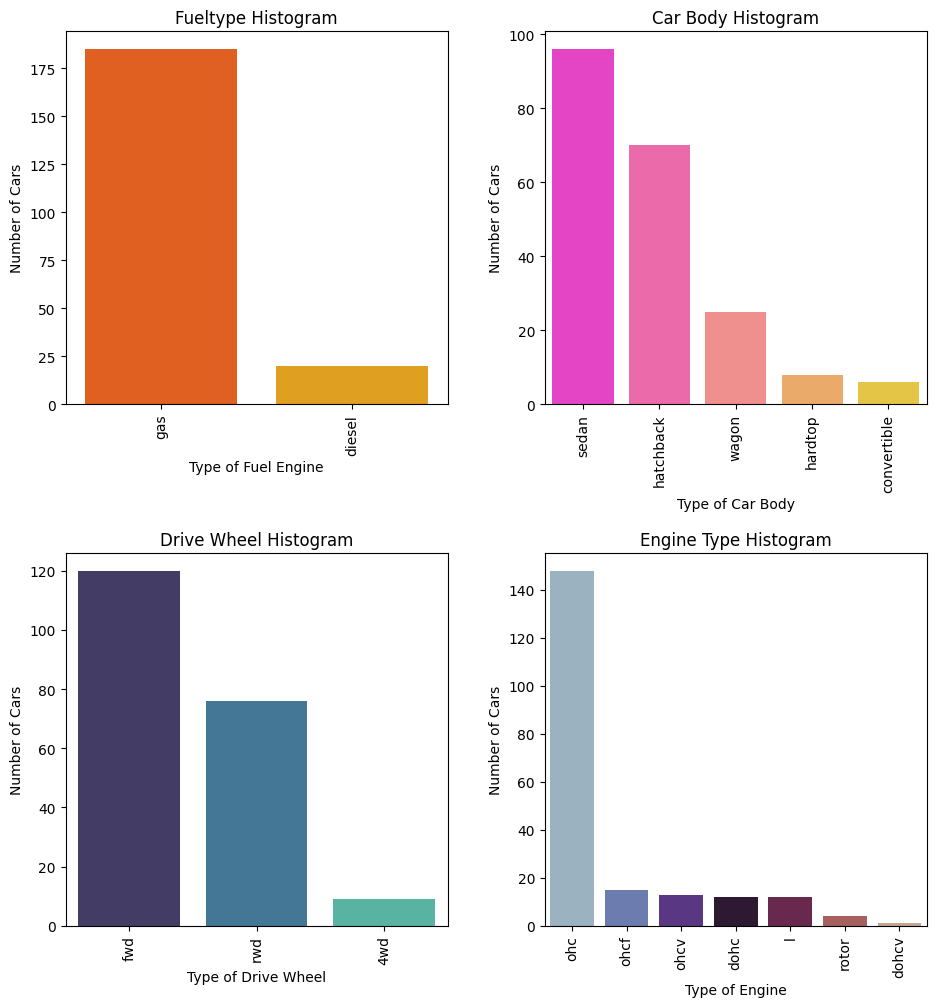

In [27]:
names = Data_frame["fueltype"].value_counts().index.tolist()
freqneucy = Data_frame["fueltype"].value_counts().values

plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.title('Fueltype Histogram')
sns.barplot(x = names, y = freqneucy, palette='autumn')
plt.xlabel("Type of Fuel Engine")
plt.ylabel("Number of Cars")
plt.xticks(rotation="vertical")


names = Data_frame["carbody"].value_counts().index.tolist()
freqneucy = Data_frame["carbody"].value_counts().values
plt.subplot(2,2,2)
plt.title('Car Body Histogram')
sns.barplot(x = names, y = freqneucy, palette='spring')
plt.xlabel("Type of Car Body")
plt.ylabel("Number of Cars")
plt.xticks(rotation="vertical")

plt.tight_layout(pad=3.0)      # To make a space between the plots

names = Data_frame["drivewheel"].value_counts().index.tolist()
freqneucy = Data_frame["drivewheel"].value_counts().values
plt.subplot(2,2,3)
plt.title('Drive Wheel Histogram')
sns.barplot(x = names, y = freqneucy, palette='mako')
plt.xlabel("Type of Drive Wheel")
plt.ylabel("Number of Cars")
plt.xticks(rotation="vertical")

names = Data_frame["enginetype"].value_counts().index.tolist()
freqneucy = Data_frame["enginetype"].value_counts().values
plt.subplot(2,2,4)
plt.title('Engine Type Histogram')
sns.barplot(x = names, y = freqneucy, palette='twilight')
plt.xlabel("Type of Engine")
plt.ylabel("Number of Cars")
plt.xticks(rotation="vertical")

plt.show()

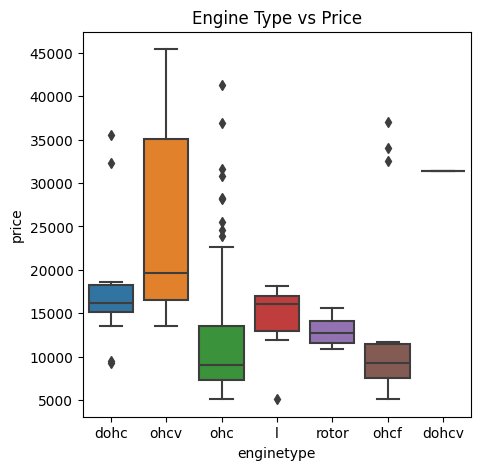

In [28]:
plt.figure(figsize=(5,5))
plt.title('Engine Type vs Price')
sns.boxplot(x = Data_frame["enginetype"], y = Data_frame["price"])
plt.show()

**Data summarizing example:**

Assume that this is a car sale report of a company in a city and the price are in USD.

In this city, toyota cars are the most famous. Most of the cars sold are front wheel drive. Majority of the popular car has ohc engine type because most of the car with the ohc engine type are below 15k USD. As for fuel engine, we have sold gas car more than dessel car. As for body type, sedan cars are most popular in this city.

In [29]:
print(Data_frame_columns)

['car_ID' 'symboling' 'CarName' 'Company_Name' 'fueltype' 'aspiration'
 'doornumber' 'carbody' 'drivewheel' 'enginelocation' 'wheelbase'
 'carlength' 'carwidth' 'carheight' 'curbweight' 'enginetype'
 'cylindernumber' 'enginesize' 'fuelsystem' 'boreratio' 'stroke'
 'compressionratio' 'horsepower' 'peakrpm' 'citympg' 'highwaympg' 'price']


In [30]:
Data_frame = Data_frame.drop("car_ID", axis = 1)
Data_frame = Data_frame.drop("CarName", axis = 1)
Data_frame = Data_frame.drop("enginelocation", axis = 1)

In [31]:
Data_frame_columns = Data_frame.columns.values
print("Number of columns:", len(Data_frame_columns))
print("Dataset's columns")
print(Data_frame_columns)

Number of columns: 24
Dataset's columns
['symboling' 'Company_Name' 'fueltype' 'aspiration' 'doornumber' 'carbody'
 'drivewheel' 'wheelbase' 'carlength' 'carwidth' 'carheight' 'curbweight'
 'enginetype' 'cylindernumber' 'enginesize' 'fuelsystem' 'boreratio'
 'stroke' 'compressionratio' 'horsepower' 'peakrpm' 'citympg' 'highwaympg'
 'price']


In [32]:
New_data_frame = Data_frame.copy()
string_column_list = []
for column_name in Data_frame_columns:
  if Data_frame[column_name].dtypes == "object":
    # New_data_frame = New_data_frame.drop(column_name, axis = 1)
    print("#################################")
    print("Column Name:", column_name)
    print(New_data_frame[column_name].value_counts())
    string_column_list.append(column_name)

print("#################################")
print(string_column_list)

#################################
Column Name: Company_Name
Company_Name
toyota         32
nissan         18
mazda          17
mitsubishi     13
honda          13
volkswagen     12
subaru         12
peugeot        11
volvo          11
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
porsche         5
isuzu           4
jaguar          3
chevrolet       3
alfa-romero     3
renault         2
mercury         1
Name: count, dtype: int64
#################################
Column Name: fueltype
fueltype
gas       185
diesel     20
Name: count, dtype: int64
#################################
Column Name: aspiration
aspiration
std      168
turbo     37
Name: count, dtype: int64
#################################
Column Name: doornumber
doornumber
four    115
two      90
Name: count, dtype: int64
#################################
Column Name: carbody
carbody
sedan          96
hatchback      70
wagon          25
hardtop         8
convertible

In [33]:
print(Data_frame["Company_Name"].unique())
print(len(Data_frame["Company_Name"].unique()))

['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'buick' 'mercury' 'mitsubishi' 'nissan' 'peugeot' 'plymouth'
 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen' 'volvo']
22


In [34]:
New_data_frame['Company_Name'] = New_data_frame['Company_Name'].map( {'alfa-romero': 0, 'audi': 1, 'bmw': 2,
                                                                      'chevrolet': 3, 'dodge': 4, 'honda': 5,
                                                                      'isuzu': 6, 'mazda': 7, 'buick': 8,
                                                                      'mercury': 9, 'mitsubishi': 10, 'nissan': 11,
                                                                      'peugeot': 12, 'plymouth': 13, 'porsche': 14,
                                                                      'renault': 15, 'saab': 16, 'subaru': 17,
                                                                      'toyota': 18, 'volkswagen': 19, 'volvo': 20, "jaguar" : 21} )
New_data_frame['fueltype'] = New_data_frame['fueltype'].map( {'gas': 0, 'diesel': 1} )
New_data_frame['aspiration'] = New_data_frame['aspiration'].map( {'std': 0, 'turbo': 1} )
New_data_frame['doornumber'] = New_data_frame['doornumber'].map( {'two': 0, 'four': 1} )
New_data_frame['drivewheel'] = New_data_frame['drivewheel'].map( {'rwd': 0, 'fwd': 1, '4wd': 2} )
New_data_frame['enginetype'] = New_data_frame['enginetype'].map( {'dohc': 0, 'ohcv': 1, 'ohc': 2,
                                                                  'l': 3, 'rotor': 4, 'ohcf': 5, "dohcv": 6} )
New_data_frame['cylindernumber'] = New_data_frame['cylindernumber'].map( {'four': 0, 'six': 1, 'five': 2,
                                                                  'three': 3, 'twelve': 4, 'two': 5, "eight": 6} )
New_data_frame['fuelsystem'] = New_data_frame['fuelsystem'].map( {'mpfi': 0, '2bbl': 1, 'mfi': 2,
                                                                  '1bbl': 3, 'spfi': 4, '4bbl': 5,
                                                                  'idi': 6, 'spdi': 7} )
New_data_frame['carbody'] = New_data_frame['carbody'].map( {'convertible': 0, 'hatchback': 1, 'sedan': 2,
                                                                  'wagon': 3, 'hardtop': 4} )

In [35]:
print(New_data_frame["fueltype"].unique())

[0 1]


In [36]:
New_Data_frame_columns = New_data_frame.columns.values
print("Number of columns:", len(New_Data_frame_columns))
print("\nDataset's columns\n", New_Data_frame_columns)
print("\n Data Types:")
print(New_data_frame.dtypes)

Number of columns: 24

Dataset's columns
 ['symboling' 'Company_Name' 'fueltype' 'aspiration' 'doornumber' 'carbody'
 'drivewheel' 'wheelbase' 'carlength' 'carwidth' 'carheight' 'curbweight'
 'enginetype' 'cylindernumber' 'enginesize' 'fuelsystem' 'boreratio'
 'stroke' 'compressionratio' 'horsepower' 'peakrpm' 'citympg' 'highwaympg'
 'price']

 Data Types:
symboling             int64
Company_Name          int64
fueltype              int64
aspiration            int64
doornumber            int64
carbody               int64
drivewheel            int64
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype            int64
cylindernumber        int64
enginesize            int64
fuelsystem            int64
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int

## Data Preparation for Model Training

In [37]:
X_train_data = New_data_frame.copy().drop("price", axis = 1)
y_train_data = New_data_frame.copy()["price"]

In [38]:
X_train_data.head()

,symboling,Company_Name,fueltype,aspiration,doornumber,carbody,drivewheel,wheelbase,carlength,carwidth,...,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
0,3,0,0,0,0,0,0,88.6,168.8,64.1,...,0,130,0,3.47,2.68,9.0,111,5000,21,27
1,3,0,0,0,0,0,0,88.6,168.8,64.1,...,0,130,0,3.47,2.68,9.0,111,5000,21,27
2,1,0,0,0,0,1,0,94.5,171.2,65.5,...,1,152,0,2.68,3.47,9.0,154,5000,19,26
3,2,1,0,0,1,2,1,99.8,176.6,66.2,...,0,109,0,3.19,3.40,10.0,102,5500,24,30
4,2,1,0,0,1,2,2,99.4,176.6,66.4,...,2,136,0,3.19,3.40,8.0,115,5500,18,22


In [39]:
y_train_data.head()

0    13495.0
1    16500.0
2    16500.0
3    13950.0
4    17450.0
Name: price, dtype: float64

## Splitting Dataset

In [40]:
X_train, X_val, y_train, y_val = train_test_split(X_train_data, y_train_data, test_size=0.2)  
print(f"Shape of X train: {X_train.shape} \nShape of y train: {y_train.shape}")
print(f"Shape of X val: {X_val.shape} \nShape of y val:{y_val.shape}")

Shape of X train: (164, 23) 
Shape of y train: (164,)
Shape of X val: (41, 23) 
Shape of y val:(41,)


## Model

In [41]:
linear_reg = LinearRegression()
linear_reg.fit(X_train,y_train)
print("R2Score for Training", linear_reg.score(X_train, y_train))

R2Score for Training 0.9062637068507732


In [42]:
y_pred = linear_reg.predict(X_val)

print("R2Score for Testing", r2_score(y_val, y_pred))
print("MAE:", mean_absolute_error(y_val, y_pred))
print("MSE:", mean_squared_error(y_val, y_pred))

R2Score for Testing 0.7389989985603496
MAE: 2284.0807836277713
MSE: 11552401.505007891


## Checking Correlation between independent variables and dependent variable

In [43]:
def scatter(x,fig):
    plt.subplot(6,4,fig)
    plt.scatter(New_data_frame[x],New_data_frame['price'])
    plt.title(x+' vs Price')
    plt.ylabel('Price')
    plt.xlabel(x)

Number of columns: 24

Dataset's columns
 ['symboling' 'Company_Name' 'fueltype' 'aspiration' 'doornumber' 'carbody'
 'drivewheel' 'wheelbase' 'carlength' 'carwidth' 'carheight' 'curbweight'
 'enginetype' 'cylindernumber' 'enginesize' 'fuelsystem' 'boreratio'
 'stroke' 'compressionratio' 'horsepower' 'peakrpm' 'citympg' 'highwaympg'
 'price']


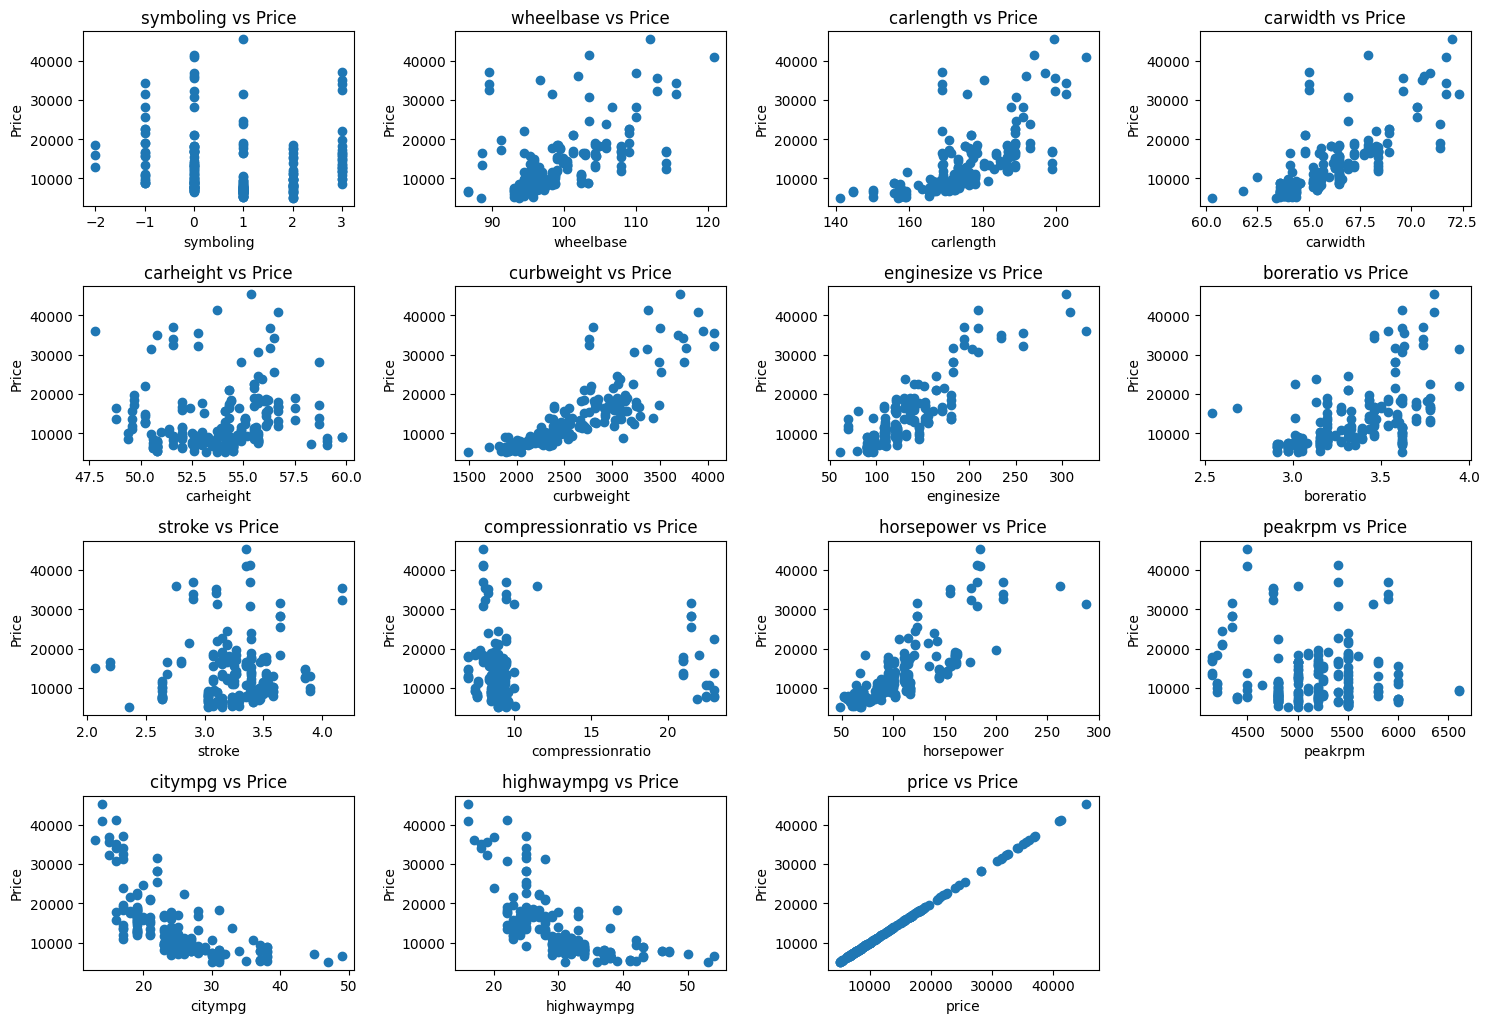

In [44]:
plt.figure(figsize=(15,15))

New_Data_frame_columns = New_data_frame.columns.values
print("Number of columns:", len(New_Data_frame_columns))
print("\nDataset's columns\n", New_Data_frame_columns)

i = 0
for column_name in New_Data_frame_columns:
  if Data_frame[column_name].dtypes != "object":
    i += 1
    scatter(column_name, i)
    plt.tight_layout()

<Axes: >

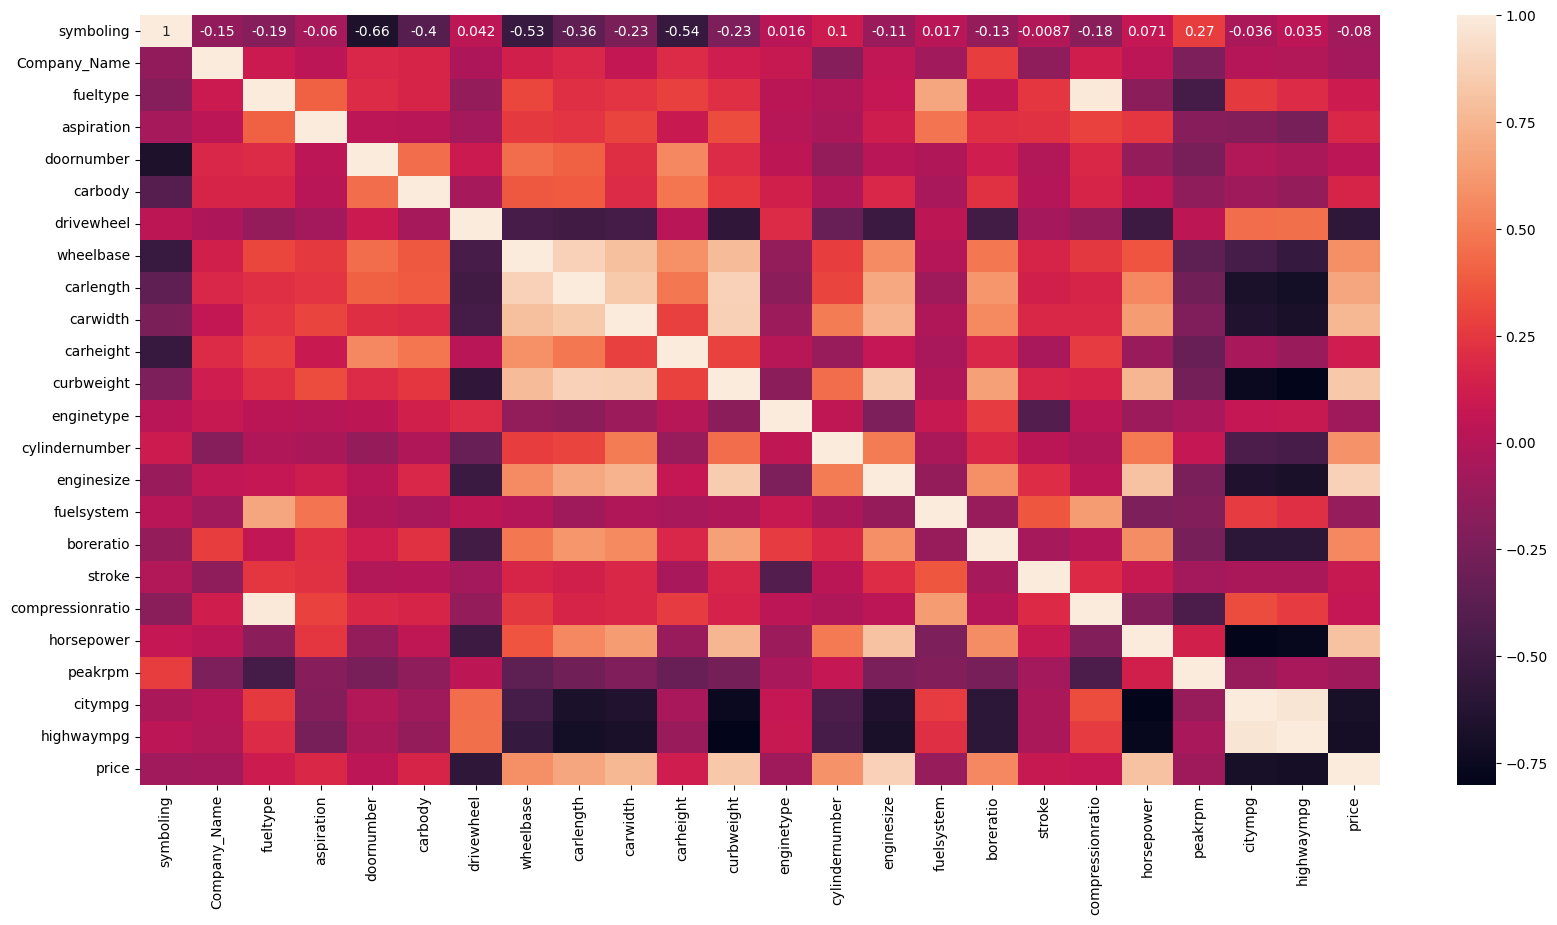

In [45]:
# Better manually select
corr_matrix = New_data_frame.corr()
plt.figure(figsize=(20,10))
sns.heatmap(corr_matrix, annot=True)

Now we can check the correlation between the prices and other features.

In [46]:
print(New_Data_frame_columns)

['symboling' 'Company_Name' 'fueltype' 'aspiration' 'doornumber' 'carbody'
 'drivewheel' 'wheelbase' 'carlength' 'carwidth' 'carheight' 'curbweight'
 'enginetype' 'cylindernumber' 'enginesize' 'fuelsystem' 'boreratio'
 'stroke' 'compressionratio' 'horsepower' 'peakrpm' 'citympg' 'highwaympg'
 'price']


In [47]:
New_data_frame = New_data_frame.drop("symboling", axis = 1)
New_data_frame = New_data_frame.drop("stroke", axis = 1)
New_data_frame = New_data_frame.drop("peakrpm", axis = 1)
New_data_frame = New_data_frame.drop("compressionratio", axis = 1)
New_data_frame = New_data_frame.drop("carheight", axis = 1)
# New_data_frame = New_data_frame.drop("Company_Name", axis = 1)
# New_data_frame = New_data_frame.drop("fueltype", axis = 1)
# New_data_frame = New_data_frame.drop("aspiration", axis = 1)
# New_data_frame = New_data_frame.drop("doornumber", axis = 1)
# New_data_frame = New_data_frame.drop("carbody", axis = 1)
# New_data_frame = New_data_frame.drop("drivewheel", axis = 1)
# New_data_frame = New_data_frame.drop("enginetype", axis = 1)
# New_data_frame = New_data_frame.drop("cylindernumber", axis = 1)
# New_data_frame = New_data_frame.drop("fuelsystem", axis = 1)

In [48]:
print(New_data_frame.columns.values)
print(len(New_data_frame.columns.values))

['Company_Name' 'fueltype' 'aspiration' 'doornumber' 'carbody'
 'drivewheel' 'wheelbase' 'carlength' 'carwidth' 'curbweight' 'enginetype'
 'cylindernumber' 'enginesize' 'fuelsystem' 'boreratio' 'horsepower'
 'citympg' 'highwaympg' 'price']
19


In [49]:
X_train_data = New_data_frame.copy().drop("price", axis = 1)
y_train_data = New_data_frame.copy()["price"]
X_train, X_val, y_train, y_val = train_test_split(X_train_data, y_train_data, test_size=0.2)  
print(f"Shape of X train: {X_train.shape} \nShape of y train: {y_train.shape}")
print(f"Shape of X val: {X_val.shape} \nShape of y val:{y_val.shape}")

Shape of X train: (164, 18) 
Shape of y train: (164,)
Shape of X val: (41, 18) 
Shape of y val:(41,)


In [50]:
linear_reg = LinearRegression()
linear_reg.fit(X_train,y_train)
print("R2Score for Training", linear_reg.score(X_train, y_train))

y_pred = linear_reg.predict(X_val)

print("R2Score for testing", r2_score(y_val, y_pred))
print("MAE:", mean_absolute_error(y_val, y_pred))
print("MSE:", mean_squared_error(y_val, y_pred))

R2Score for Training 0.8854394917892714
R2Score for testing 0.6493707880050053
MAE: 2225.323078823666
MSE: 9962233.739972843


Text(0, 0.5, 'y_pred')

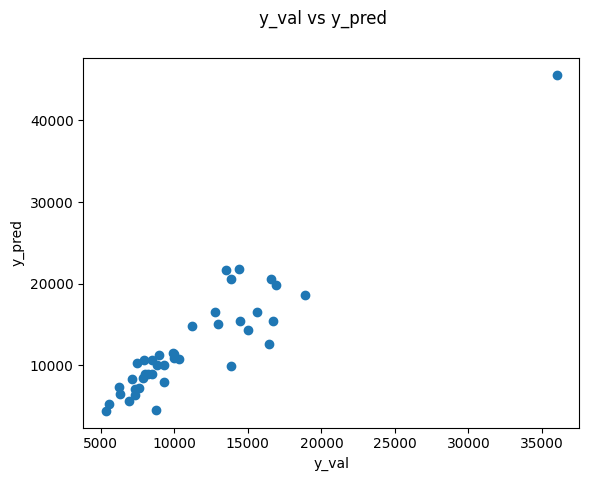

In [51]:
fig = plt.figure()
plt.scatter(y_val,y_pred)
fig.suptitle('y_val vs y_pred')            
# plt.title('y_val vs y_pred')  
plt.xlabel('y_val')                       
plt.ylabel('y_pred')   

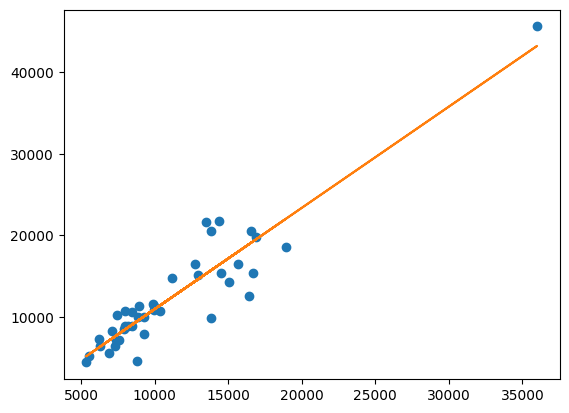

In [52]:
#create basic scatterplot
plt.plot(y_val, y_pred, 'o')

#obtain m (slope) and b(intercept) of linear regression line
m, b = np.polyfit(y_val, y_pred, 1)

#add linear regression line to scatterplot 
plt.plot(y_val, m*y_val+b)